In [2]:
import yfinance as yf
import pandas as pd
from pandas_datareader import data as pdr
import datetime as dt
import numpy as np


# Declaring the Date Range for out Stock Returns

Here, we use Python’s datetime module to define a date range for our stock analysis. We declare the current date as the endDate, and the startDate as five years before the current date.

In [3]:
# current date
endDate = dt.datetime.now()

# first date in the range (i.e. period of time for which we want to get stock data)
startDate = endDate - dt.timedelta(days=365 * 5)  # 5 years before the current date

endDate, startDate

(datetime.datetime(2025, 8, 2, 12, 39, 40, 44106),
 datetime.datetime(2020, 8, 3, 12, 39, 40, 44106))

# Creating a list of stocks that we are interested in 
We create a list of stock symbols that we are interested in analyzing. This list can be modified to include any stock symbols available on Yahoo Finance.

In [4]:
stocks = [ 'AAPL', 'MSFT', 'GOOGL', 'AMZN', 'TSLA', 'FB', 'NFLX', 'NVDA', 'BRK-B', 'V' ] 

# Download the stock data from Yahoo Finance
We use the yfinance library to download historical stock data for the specified stocks and date range.

In [5]:
df = yf.download(stocks, start=startDate, end=endDate)

C:\Users\Arnav\AppData\Local\Temp\ipykernel_7524\710625603.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(stocks, start=startDate, end=endDate)
[*********************100%***********************]  10 of 10 completed


In [9]:
df.head() 
# df.columns

Price            Close                                                     \
Ticker            AAPL        AMZN       BRK-B  FB      GOOGL        MSFT   
Date                                                                        
2020-08-03  105.894775  155.594498  199.259995 NaN  73.696022  207.463882   
2020-08-04  106.601952  156.941498  200.240005 NaN  73.225845  204.350067   
2020-08-05  106.988350  160.251495  203.619995 NaN  73.513611  204.014755   
2020-08-06  110.721115  161.250000  205.020004 NaN  74.798897  207.281845   
2020-08-07  108.203781  158.373001  209.479996 NaN  74.471870  203.574036   

Price                                                     ...     Volume  \
Ticker            NFLX       NVDA       TSLA           V  ...       AAPL   
Date                                                      ...              
2020-08-03  498.619995  10.974078  99.000000  184.031677  ...  308151200   
2020-08-04  509.640015  11.190865  99.133331  185.575821  ...  173071600   
2020-08-05  502.109985  11.249668  99.001335  189.252777  ...  121776800   
2020-08-06  509.079987  11.298259  99.305336  191.829559  ...  202428800   
2020-08-07  494.730011  11.162707  96.847336  189.503708  ...  198045600   

Price                                                                       \
Ticker           AMZN    BRK-B  FB     GOOGL      MSFT     NFLX       NVDA   
Date                                                                         
2020-08-03  101494000  6251000 NaN  45482000  78983000  5873100  412720000   
2020-08-04   93886000  3838800 NaN  37212000  49280100  5608000  310336000   
2020-08-05   78330000  5184500 NaN  29134000  28806400  4308200  249924000   
2020-08-06   78812000  3380700 NaN  33306000  32656800  3725900  244316000   
2020-08-07   78722000  6186000 NaN  27718000  27820400  5910300  342516000   

Price                            
Ticker           TSLA         V  
Date                             
2020-08-03  132139500  11405200  
2020-08-04  126225000   8204000  
2020-08-05   74217000   8876800  
2020-08-06   89884500   7480300  
2020-08-07  133446000   5654000  

[5 rows x 50 columns]

# Selecting the Adjusted Close Price
I am using the **Adjusted Close** price because it provides a more accurate picture of a stock's historical value than the simple closing price. It accounts for corporate actions that directly affect the stock's price, such as **dividends** and **stock splits**.

---

## Why Adjusted Close is Better for Analysis

Imagine you're analyzing a stock's performance over several years. Here's how using the simple "Close" price can be misleading:

* **Dividends:** When a company pays a dividend, its stock price typically drops by about the same amount on the ex-dividend date. The "Adjusted Close" price smooths this out by retroactively reducing the historical prices before the dividend was paid. This makes it look like the stock's growth was steady, rather than showing artificial drops every quarter. 
* **Stock Splits:** If a company announces a 2-for-1 stock split, the share price is instantly halved. The "Adjusted Close" accounts for this by adjusting all historical prices before the split, preventing a massive, misleading plunge in your charts. This ensures that the stock's historical trend remains consistent.

By using the Adjusted Close, you are analyzing the stock's true historical performance and return, as if you had reinvested all dividends. This makes it the standard and most reliable price to use for any kind of financial analysis or backtesting.



we however, don't have a separate Adjusted Close column in the data from yahoo finance, this happens because of a default setting in yfinance. The yf.download() function has a parameter called auto_adjust, which is set to True by default.

When auto_adjust=True:

It automatically adjusts the 'Open', 'High', 'Low', and 'Close' prices for dividends and stock splits.

It then removes the original 'Adj Close' column because the regular 'Close' column is now already the adjusted price.

This is actually a helpful feature, as it means you can simply use df['Close'] for your analysis.

In [14]:
#print(df.columns)
close_prices = df['Close']
close_prices.head()

Ticker,AAPL,AMZN,BRK-B,FB,GOOGL,MSFT,NFLX,NVDA,TSLA,V
Date,,,,,,,,,,
2020-08-03,105.894775,155.594498,199.259995,NaN,73.696022,207.463882,498.619995,10.974078,99.000000,184.031677
2020-08-04,106.601952,156.941498,200.240005,NaN,73.225845,204.350067,509.640015,11.190865,99.133331,185.575821
2020-08-05,106.988350,160.251495,203.619995,NaN,73.513611,204.014755,502.109985,11.249668,99.001335,189.252777
2020-08-06,110.721115,161.250000,205.020004,NaN,74.798897,207.281845,509.079987,11.298259,99.305336,191.829559
2020-08-07,108.203781,158.373001,209.479996,NaN,74.471870,203.574036,494.730011,11.162707,96.847336,189.503708


# Calculating Daily Returns
We calculate the daily log returns of the stocks using the pct_change() function from the pandas library and the natural logarithm function from the numpy library.

In [15]:
log_returns = np.log(close_prices / close_prices.shift(1))
log_returns.head()

Ticker,AAPL,AMZN,BRK-B,FB,GOOGL,MSFT,NFLX,NVDA,TSLA,V
Date,,,,,,,,,,
2020-08-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-08-04,0.006656,0.008620,0.004906,NaN,-0.006400,-0.015123,0.021860,0.019562,0.001346,0.008356
2020-08-05,0.003618,0.020871,0.016739,NaN,0.003922,-0.001642,-0.014885,0.005241,-0.001332,0.019620
2020-08-06,0.034295,0.006212,0.006852,NaN,0.017333,0.015887,0.013786,0.004310,0.003066,0.013524
2020-08-07,-0.022998,-0.018003,0.021521,NaN,-0.004382,-0.018050,-0.028593,-0.012070,-0.025063,-0.012199


In [16]:
cumulative_returns = log_returns.cumsum()
cumulative_returns.head()

Ticker,AAPL,AMZN,BRK-B,FB,GOOGL,MSFT,NFLX,NVDA,TSLA,V
Date,,,,,,,,,,
2020-08-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-08-04,0.006656,0.008620,0.004906,NaN,-0.006400,-0.015123,0.021860,0.019562,0.001346,0.008356
2020-08-05,0.010274,0.029491,0.021645,NaN,-0.002478,-0.016765,0.006975,0.024803,0.000013,0.027976
2020-08-06,0.044569,0.035703,0.028497,NaN,0.014854,-0.000878,0.020761,0.029113,0.003079,0.041499
2020-08-07,0.021570,0.017700,0.050018,NaN,0.010473,-0.018928,-0.007832,0.017043,-0.021984,0.029301


<Axes: title={'center': 'Cumulative Returns'}, xlabel='Date'>

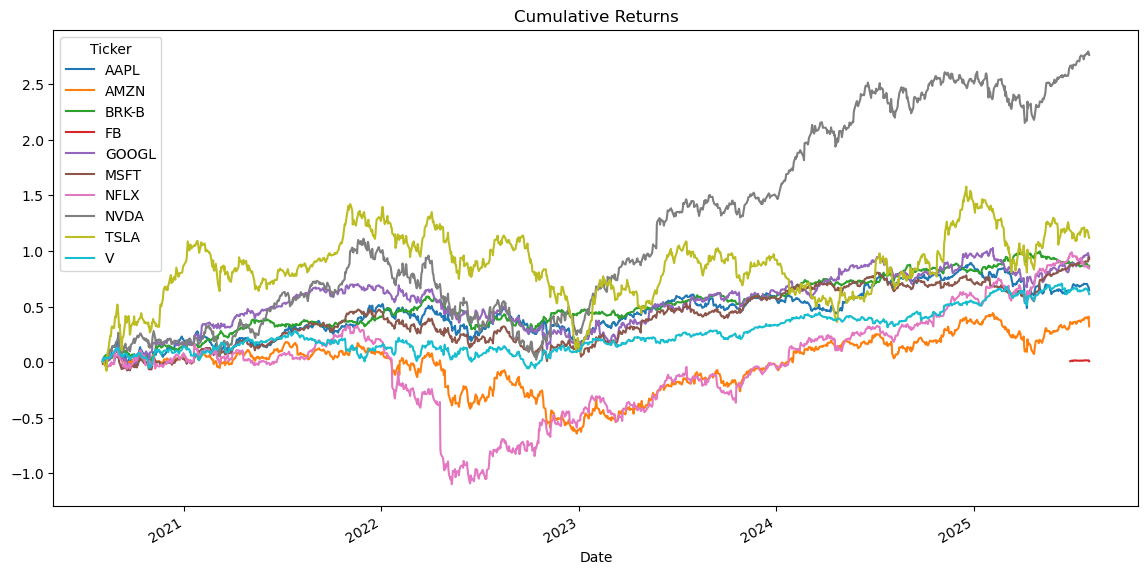

In [17]:
cumulative_returns.plot(title='Cumulative Returns', figsize=(14, 7))